# Student Performance Indicator Project

## Life Cycle of Machine Learning Project
- Understanding the Problem STatement
- Data Collection
- Data Checks to Perform
- Exploratory Data Analysis
- Data Preprocessing 
- MOdel Traning
- Choose Best Model

### 1. Problem Statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental Level of Education, Lunch and Test preparation course.

### 2. Data Collection
- Data Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.

#### 2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
# suppress all warning messages to keep the output clean
warnings.filterwarnings('ignore')

##### import the CSV data as Pandas Dataframe

In [2]:
df = pd.read_csv('Data/stud.csv')

In [3]:
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75

In [4]:
# Shape of the Dataset
df.shape

(1000, 8)

#### Dataset  Information
- gender: sex of students -> (Male/ Female) 
- race/ethnicity: ethnicity of students -> (Group A, B, C, D, E)
- parental level of education: parents' final education -> bachelor's degree,some college, master's degree, associate's degree, high school)
- lunch : having lunch before test ( standard or free/reduced)
- test preparation course: complete or not complete before test
- match score
- reading score
- writing score

### 3. Data Checks to Perform
- Check Missing Values
- Check Duplicates 
- Ceck Datatypes
- Check the number of unique values
- Check Statistics of Dataset
- Check various categories present in the different Categorical column

#### 3.1 Check Missing Values

In [5]:
df.isna().sum()

gender                         0
race_ethnicity                 0
parental_level_of_education    0
lunch                          0
test_preparation_course        0
math_score                     0
reading_score                  0
writing_score                  0
dtype: int64

there are no missing value in our datatset

In [6]:
df.duplicated().sum()

0

There are no duplicate values in the dataset

#### 3.3 Check Datatypes

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


3 numerical columns and 5 categorical columns

#### 3.4 Check the number of unique values of each column

In [8]:
df.nunique()

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

#### 3.5 Check statistics of the Dataset

In [9]:
df.describe()

math_score  reading_score  writing_score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Meaningful Insights:
- From above description of numerical data, all means are very close to each other - between 66 & 68.05
- All standard deviation are also close - between 14.6 and 15.19
- While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading minimum is much higher = 17

#### 3.6 Check Various Categories present in Different Cateogorical Column

In [10]:
print("Categories in 'gender' variable: ", end=" ")
print(df['gender'].unique())

print("Categories in 'race_ethnicity' variable: ", end=" ")
print(df['race_ethnicity'].unique())


print("Categories in 'parental_level_of_education' variable: ", end=" ")
print(df['parental_level_of_education'].unique())


print("Categories in 'lunch' variable: ", end=" ")
print(df['lunch'].unique())


print("Categories in 'test_preparation_course' variable: ", end=" ")
print(df['test_preparation_course'].unique())



Categories in 'gender' variable:  ['female' 'male']
Categories in 'race_ethnicity' variable:  ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in 'parental_level_of_education' variable:  ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:  ['standard' 'free/reduced']
Categories in 'test_preparation_course' variable:  ['none' 'completed']


In [11]:
# define numerical and categorical column
numerical_features = [feature for feature in df.columns if df[feature].dtype !='O']
categorical_features = [feature for feature in df.columns if df[feature].dtype =='O']

# print columns
print('We have {} numerical features: {}'.format(len(numerical_features), numerical_features))
print('We have {} categorical features: {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features: ['math_score', 'reading_score', 'writing_score']
We have 5 categorical features: ['gender', 'race_ethnicity', 'parental_level_of_education', 'lunch', 'test_preparation_course']


In [12]:
df.head(2)

gender race_ethnicity parental_level_of_education     lunch  \
0  female        group B           bachelor's degree  standard   
1  female        group C                some college  standard   

  test_preparation_course  math_score  reading_score  writing_score  
0                    none          72             72             74  
1               completed          69             90             88

#### 3.7 Adding column for "Total Score" and "Average"

In [13]:
df['total_score'] = df['math_score'] + df['reading_score'] + df['writing_score']
df['average'] = df['total_score'] / 3
df.head()

gender race_ethnicity parental_level_of_education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test_preparation_course  math_score  reading_score  writing_score  \
0                    none          72             72             74   
1               completed          69             90             88   
2                    none          90             95             93   
3                    none          47             57             44   
4                    none          76             78             75   

   total_score    average  
0          218  72.666667  
1          247  82.333333  
2          278  92.666667  
3          148  49.333333  
4          229  76.333333

In [14]:
reading_full_marks= df[df['reading_score'] == 100]['average'].count()
writing_full_marks= df[df['writing_score'] == 100]['average'].count()
math_full_marks = df[df['math_score'] == 100]['average'].count()

print("Number of Students with full marks in Reading: {}".format(reading_full_marks))
print("Number of Students with full marks in Writing: {}".format(writing_full_marks))
print("Number of Students with full marks in Maths: {}".format(math_full_marks))

Number of Students with full marks in Reading: 17
Number of Students with full marks in Writing: 14
Number of Students with full marks in Maths: 7


In [15]:
reading_less_20 = df[df['reading_score']<=20]['average'].count()
writing_less_20 = df[df['writing_score']<=20]['average'].count()
math_less_20 = df[df['math_score']<=20]['average'].count()
print('Number of Students with less than 20 marks in Maths: {}'.format(math_less_20))
print('Number of Students with less than 20 marks in Reading: {}'.format(reading_less_20))
print('Number of Students with less than 20 marks in Writing: {}'.format(writing_less_20))


Number of Students with less than 20 marks in Maths: 4
Number of Students with less than 20 marks in Reading: 1
Number of Students with less than 20 marks in Writing: 3


Insights:
- From above values, we observe that Students have performed the worst in math_less_20
- Best performance is in reading section

### 4. Exploring Data ( Visualization)
#### 4.1 Visualize average score distribution to make some conclusion
- Histogram
- Kernel Distribution Fucntion (KDE)

#### 4.1.1 Histogram & KDE

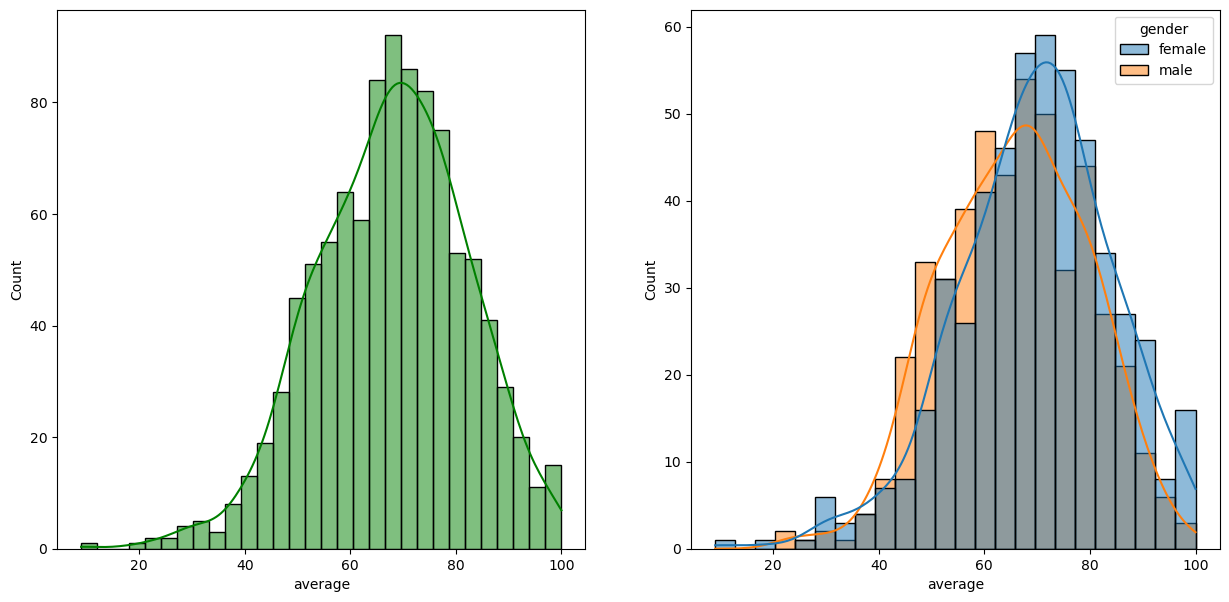

In [16]:

fig, axs = plt.subplots(1,2, figsize = (15,7))
plt.subplot(121)
sns.histplot(data=df, x='average', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='average', kde=True, hue='gender')
plt.show()

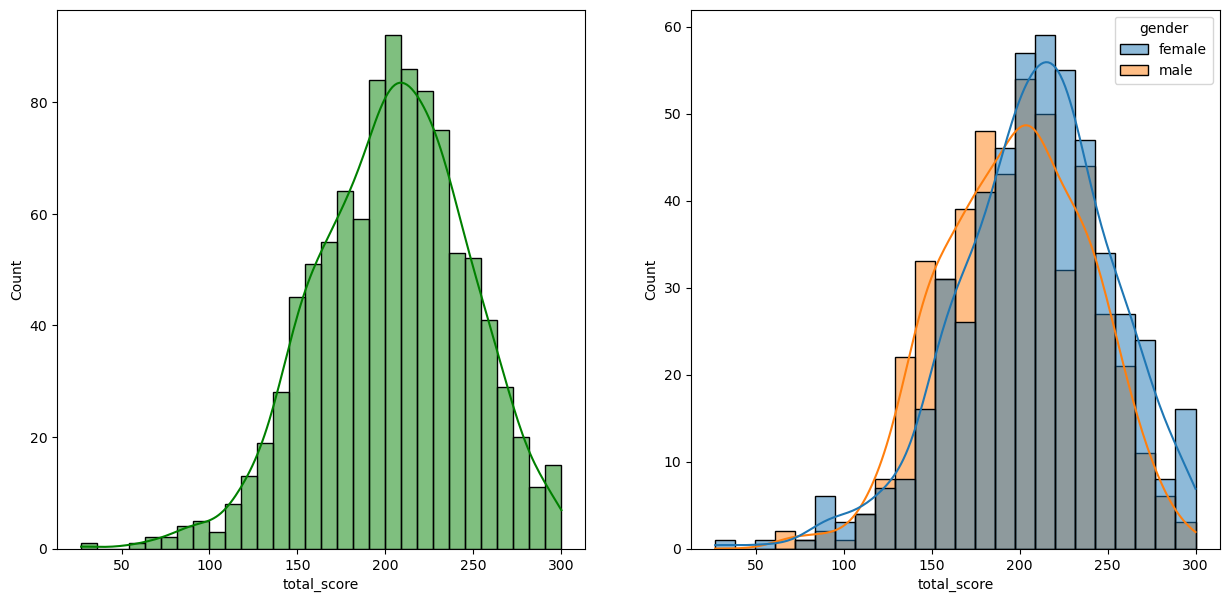

In [17]:
fig,axs = plt.subplots(1,2, figsize=(15,7))
plt.subplot(121)
sns.histplot(data=df, x='total_score', bins= 30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='total_score', kde=True, hue='gender')
plt.show()

Insights
- Female Students tend to perform well then male students

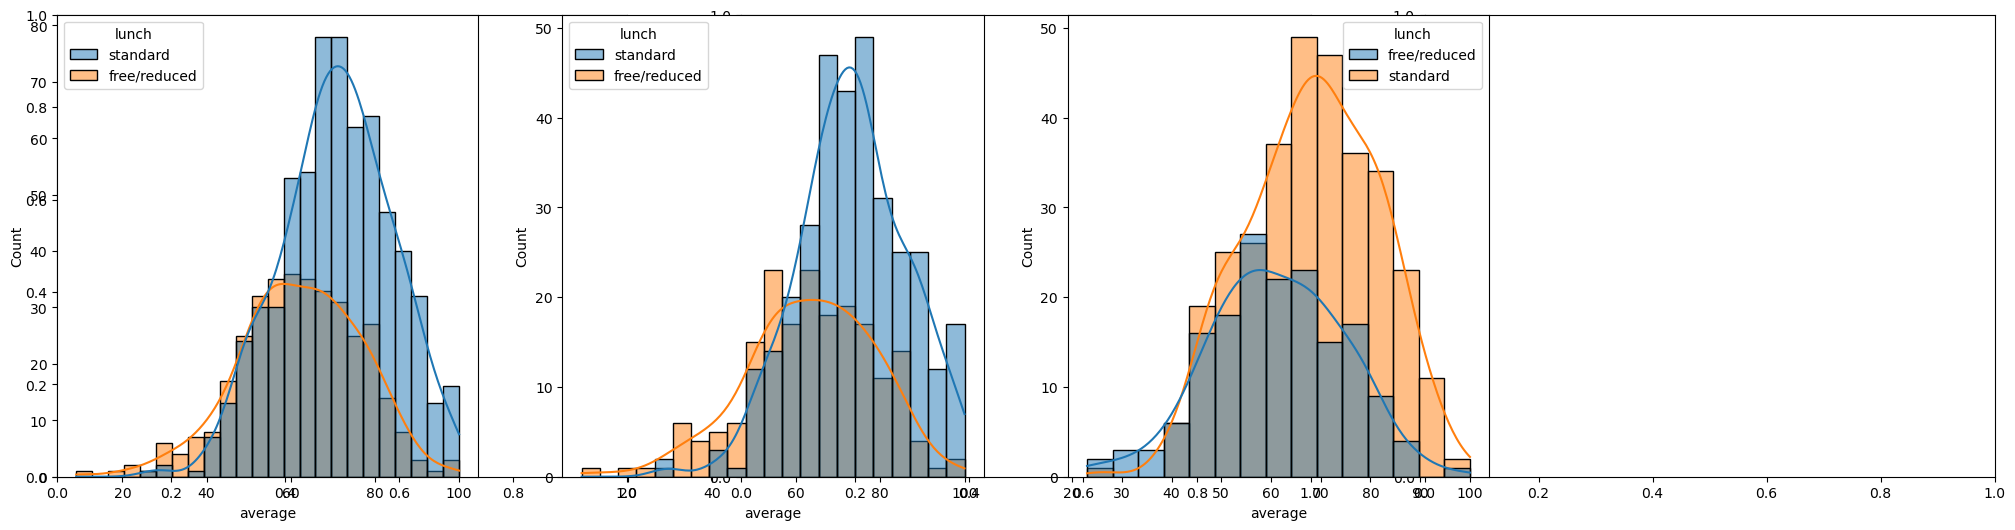

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
sns.histplot(data=df, x='average', kde=True, hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='lunch')
plt.show()

Insights:
- Standard lunch helps perform well in exams,
- Standard lunch helps perform well in exams be it a male or female

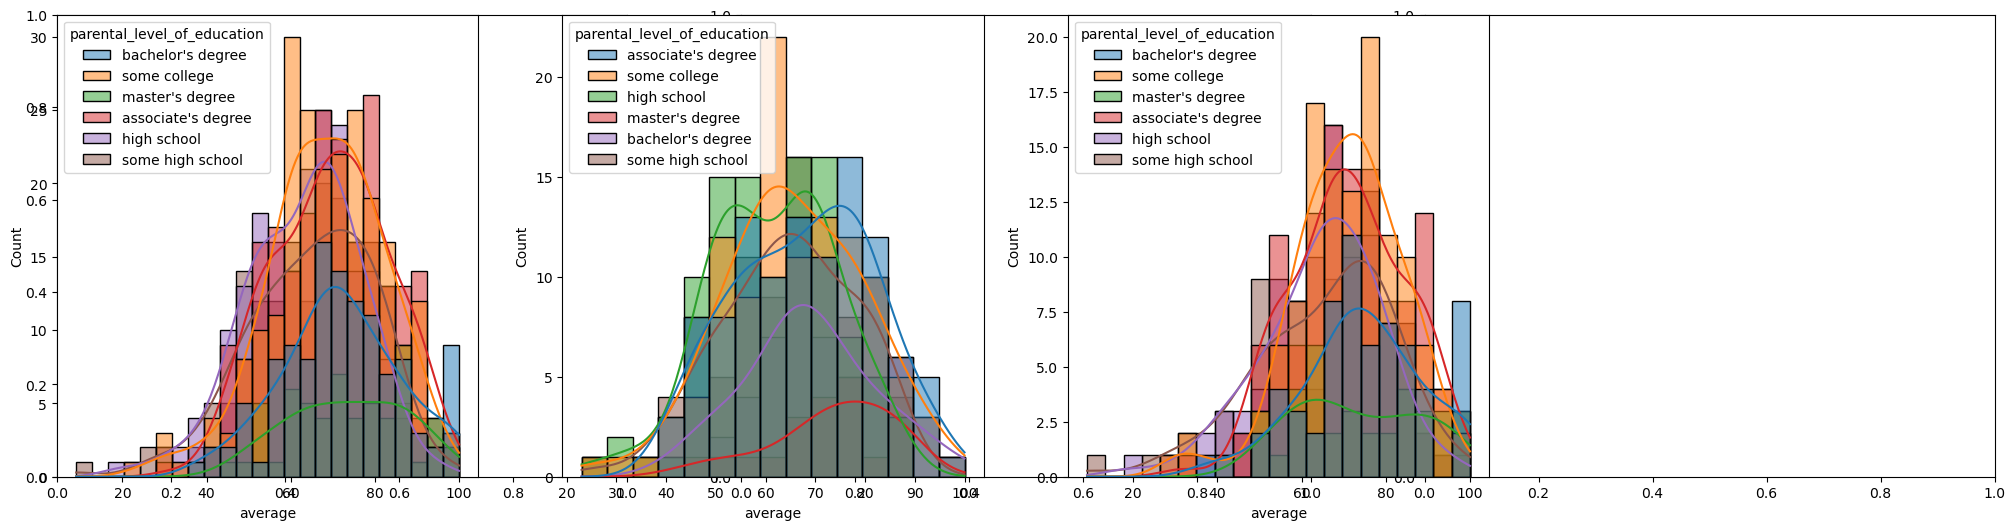

In [19]:
plt.subplots(1,3, figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df, x='average', kde=True, hue='parental_level_of_education')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='parental_level_of_education')
plt.subplot(143)
ax = sns.histplot(data=df[df.gender=='female'], x='average', kde=True, hue='parental_level_of_education')
plt.show()

Insights:
- In general parent's education don't help student perform well in exam
- 2nd plot shows that parent's whose education is of associate's degree or masters degree their male child tend to perform well in exam.
- 3rd plot we can see there is no effect of parent's education on female students.


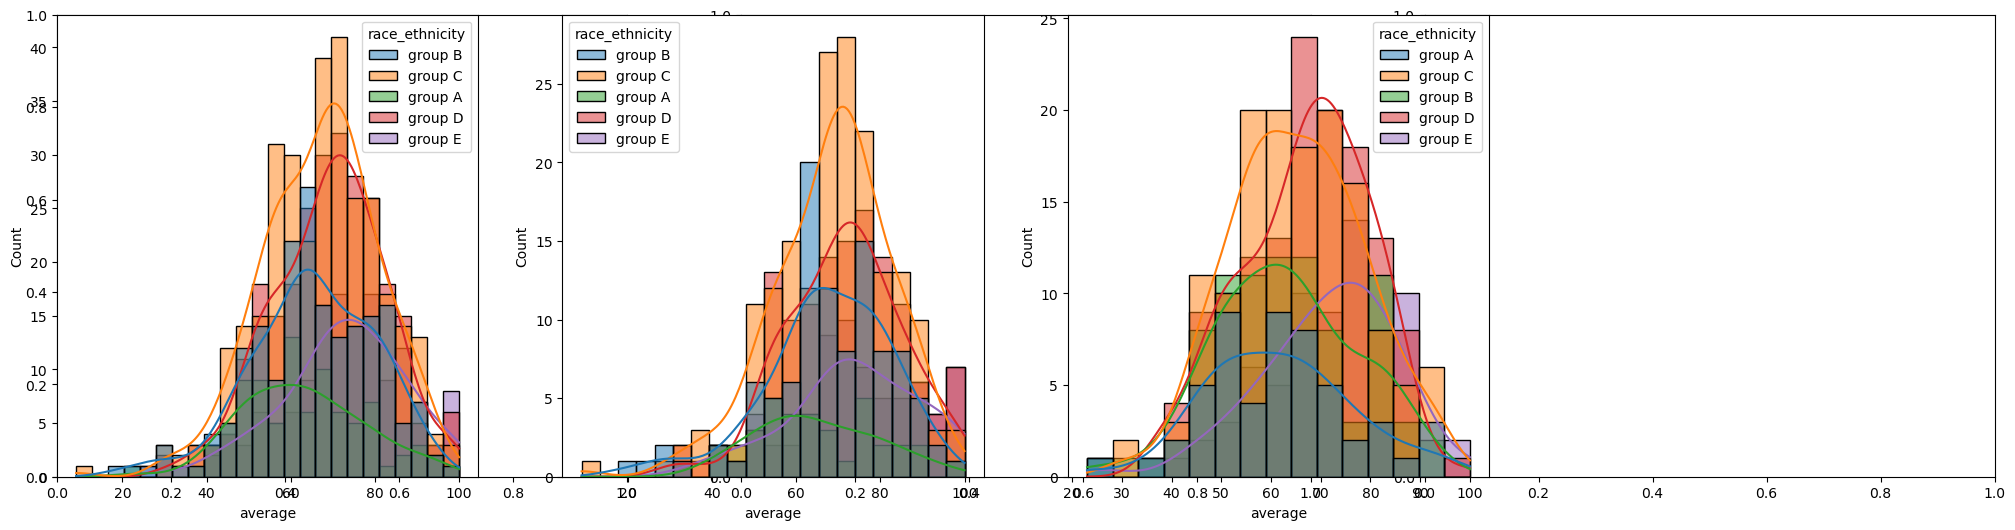

In [20]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(141)
ax=sns.histplot(data=df, x='average', kde=True, hue='race_ethnicity')
plt.subplot(142)
ax=sns.histplot(data=df[df.gender=='female'], x='average',kde=True, hue='race_ethnicity')
plt.subplot(143)
ax=sns.histplot(data=df[df.gender=='male'], x='average', kde=True, hue='race_ethnicity')
plt.show()


Insights:
- Students of Group A and group B tends to perform poorly in exam
- Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female.

#### 4.2 Maximum score of students in all three subjects

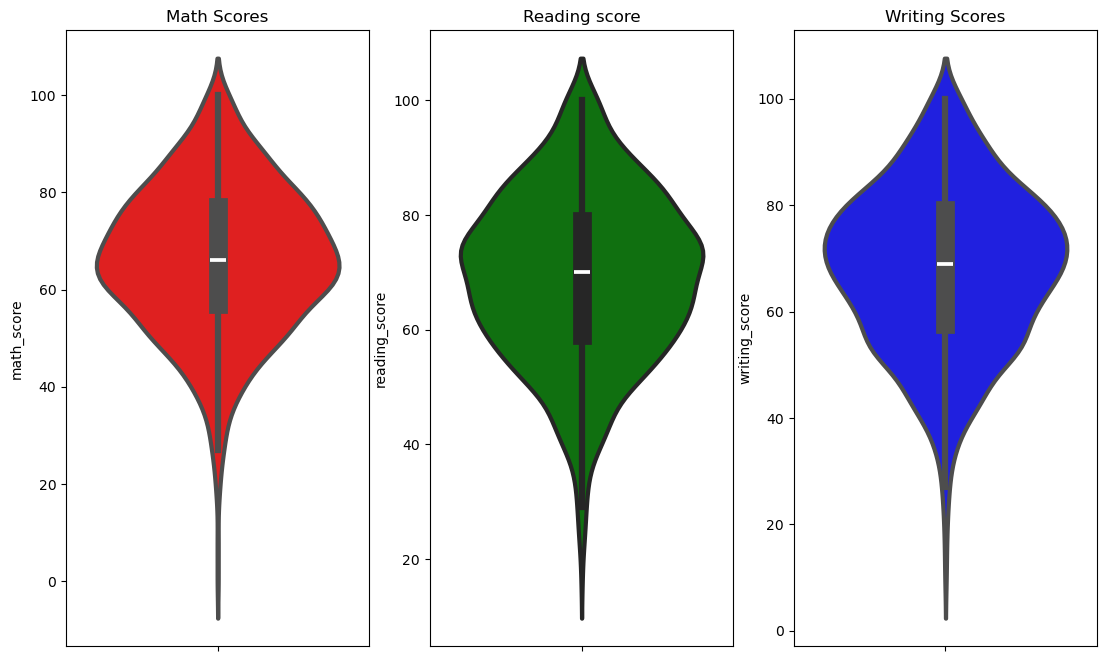

In [21]:
plt.figure(figsize=(18,8))
plt.subplot(1,4,1)
plt.title('Math Scores')
sns.violinplot(y='math_score', data=df, color='red', linewidth=3)
plt.subplot(1,4,2)
plt.title('Reading score')
sns.violinplot(y='reading_score', data=df, color='green', linewidth=3)
plt.subplot(1,4,3)
plt.title('Writing Scores')
sns.violinplot(y='writing_score', data=df, color='blue', linewidth=3)
plt.show()


Insights:
- From the above three plots its clearly visible that most of the sudents score in between 60 - 80 in Maths whereas in reading and writing most of them score from 50-80

### 4.3 Multivariate analysis using pieplot

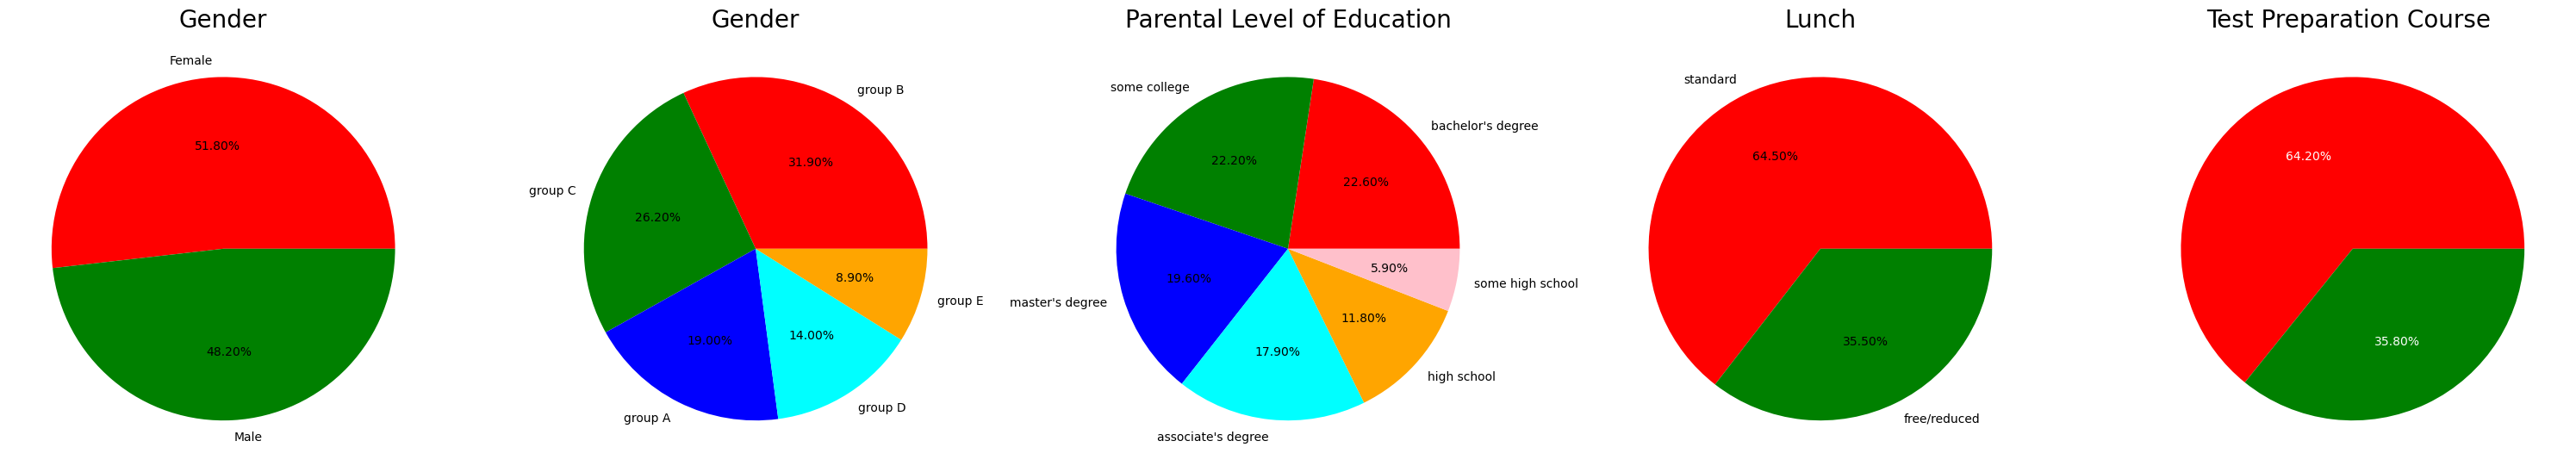

In [22]:
fig, axes = plt.subplots(1, 5, figsize=(30, 12))
fig.patch.set_facecolor('white')
for ax in axes:
    ax.set_facecolor('white')


plt.rcParams['figure.figsize']=(30,12)
plt.subplot(1,5,1)
size=df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')



plt.subplot(1,5,2)
size=df['race_ethnicity'].value_counts()
labels = 'group B','group C', 'group A', 'group D', 'group E'
color = ['red', 'green', 'blue', 'cyan', 'orange']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Gender', fontsize=20)
plt.axis('off')


plt.subplot(1,5,3)
size=df['parental_level_of_education'].value_counts()
labels = "bachelor's degree",'some college', "master's degree", "associate's degree", 'high school', 'some high school'
color = ['red', 'green', 'blue', 'cyan', 'orange', 'pink']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Parental Level of Education', fontsize=20)
plt.axis('off')



plt.subplot(1,5,4)
size=df['lunch'].value_counts()
labels = 'standard', 'free/reduced'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%')
plt.title('Lunch', fontsize=20)
plt.axis('off')



plt.subplot(1,5,5)
size=df['test_preparation_course'].value_counts()
labels = 'none', 'completed'
color = ['red', 'green']
plt.pie(size, colors=color, labels=labels, autopct='%.2f%%', textprops={'color': 'white'})
plt.title('Test Preparation Course ', fontsize=20)
plt.axis('off')


plt.tight_layout()
plt.grid()
plt.show()


Insights:
- Number of male and Female students is almost equal.
- Number of students in Group C are more than in any group
- Standard Lunch students are also large.
- Number of Students who have not enrolled in any test preparation course is greater.
- Number of students whose parental educations is "Some College" is greater followed closely by "Associate's Degree"

### 4.4 FEature Wise Visualization
#### 4.4.1 GENDER COLUMN
- How is distribution of Gender?
-  Does Gender has any impact on Student's performance

##### __UNIVARIATE ANALYSIS ( How is Distrubution of Gender? )__

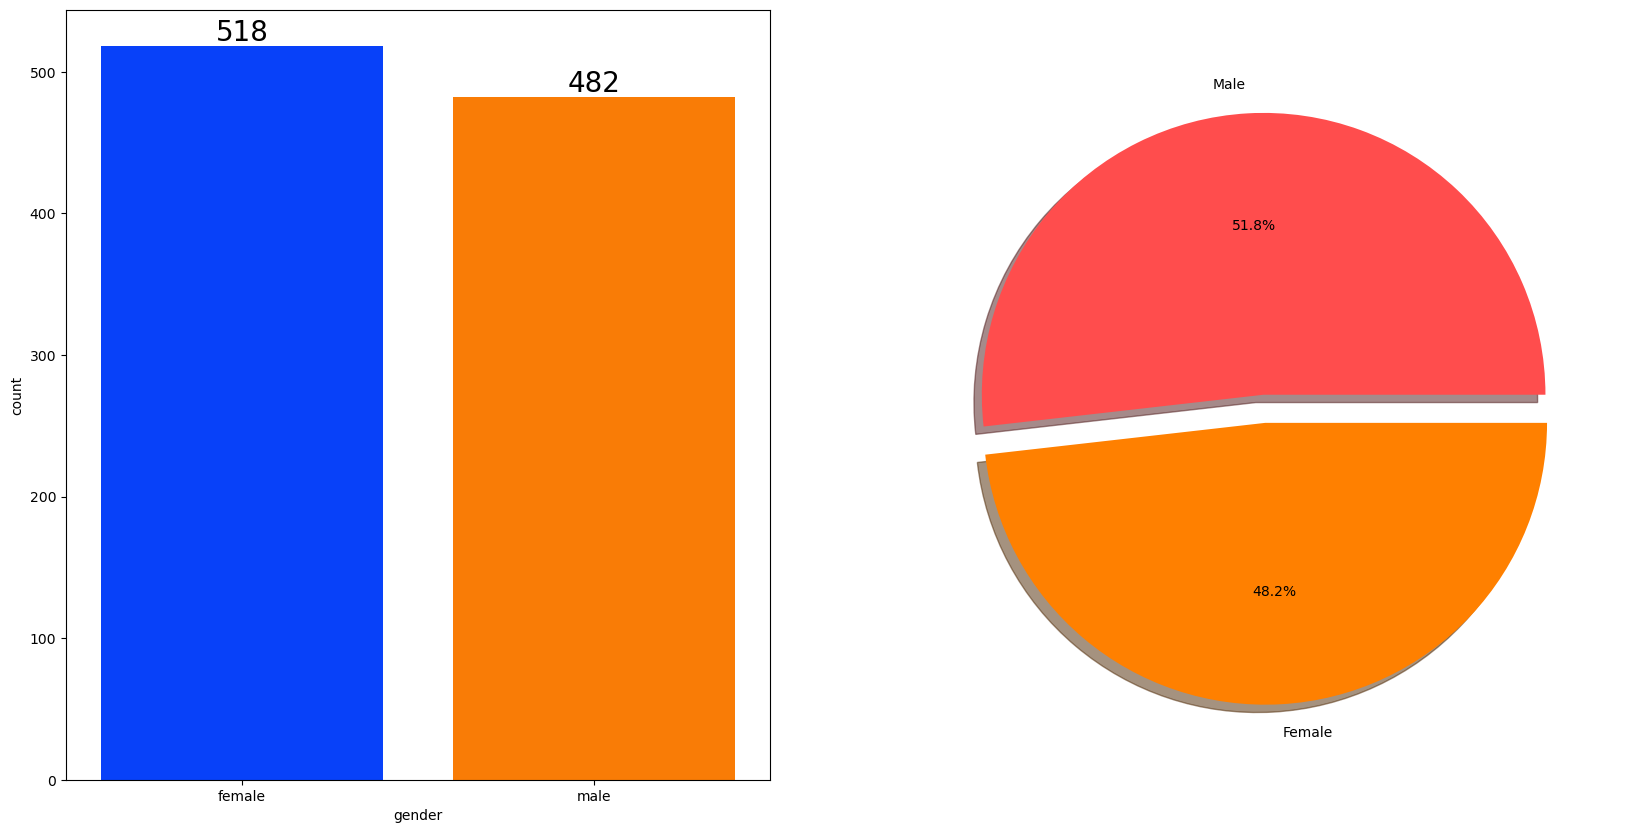

In [23]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['gender'], data=df, palette='bright', ax=ax[0], saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container, color='black', size=20)

plt.pie(x=df['gender'].value_counts(), labels=["Male", "Female"], explode=[0,0.1],autopct='%1.1f%%',shadow=True,colors=['#ff4d4d','#ff8000'])
plt.show()



Insights:
- Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

__BIVARIATE ANALYSIS__ ( Is gender has any impact on Student's performance?)

In [24]:
gender_group = df.groupby('gender')
gender_group_df = pd.DataFrame(gender_group)

In [25]:
gender_group_df

0                                                  1
0  female       gender race_ethnicity parental_level_of_e...
1    male      gender race_ethnicity parental_level_of_ed...

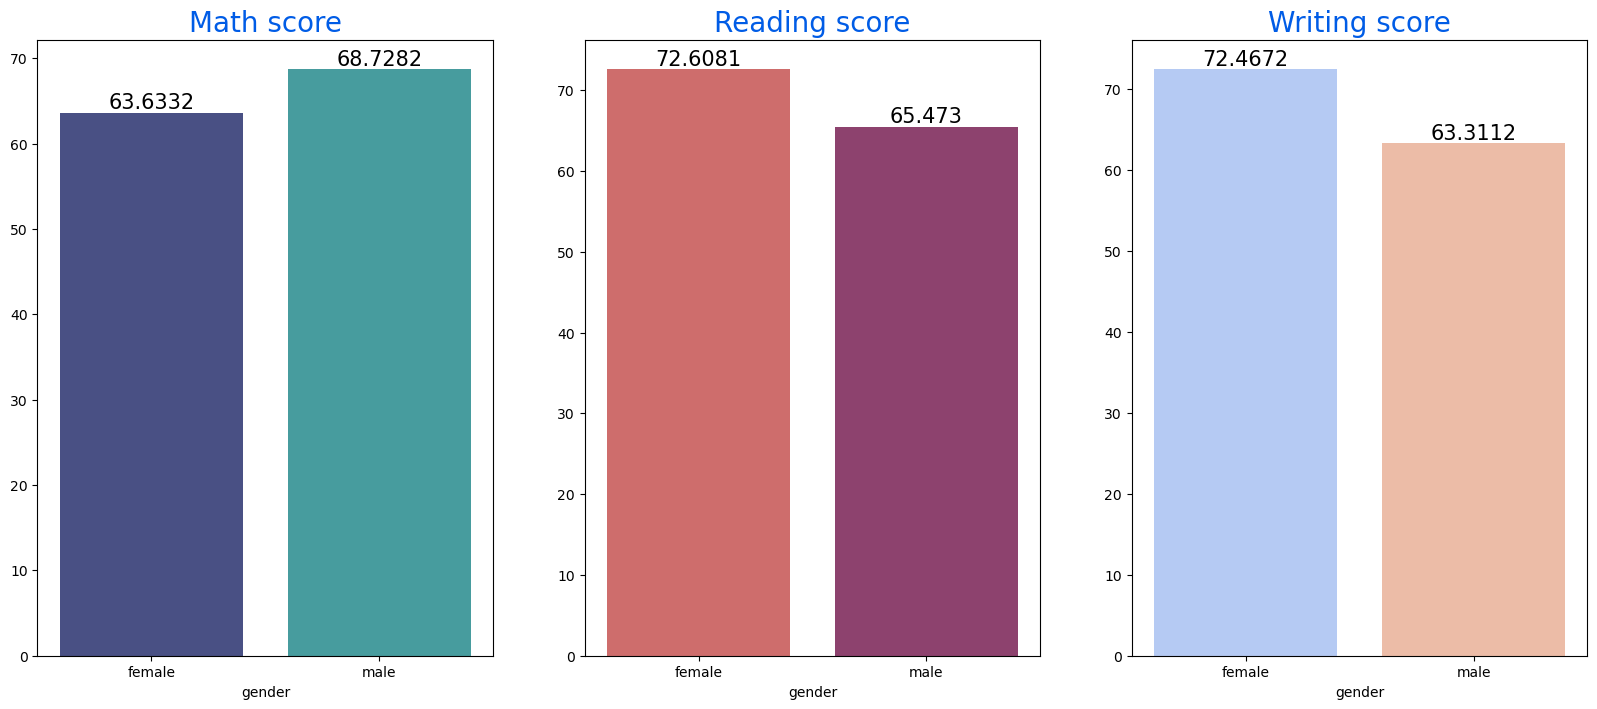

In [26]:
Group_data1=df.groupby('gender')
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=Group_data1['math_score'].mean().index,y=Group_data1['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data1['reading_score'].mean().index,y=Group_data1['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data1['writing_score'].mean().index,y=Group_data1['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights:
- Male dominate the math score mostly
- But in reading and writing male have poor performance than females.


#### 4.4.2. RACE/ETHNICITY COLUMN
- How is Group wise distribution
- Is Race/Ethnicity has any impact on Student's performance?

UNIVARIATE ANALYSIS: How is the distribution of column race_ethnicity

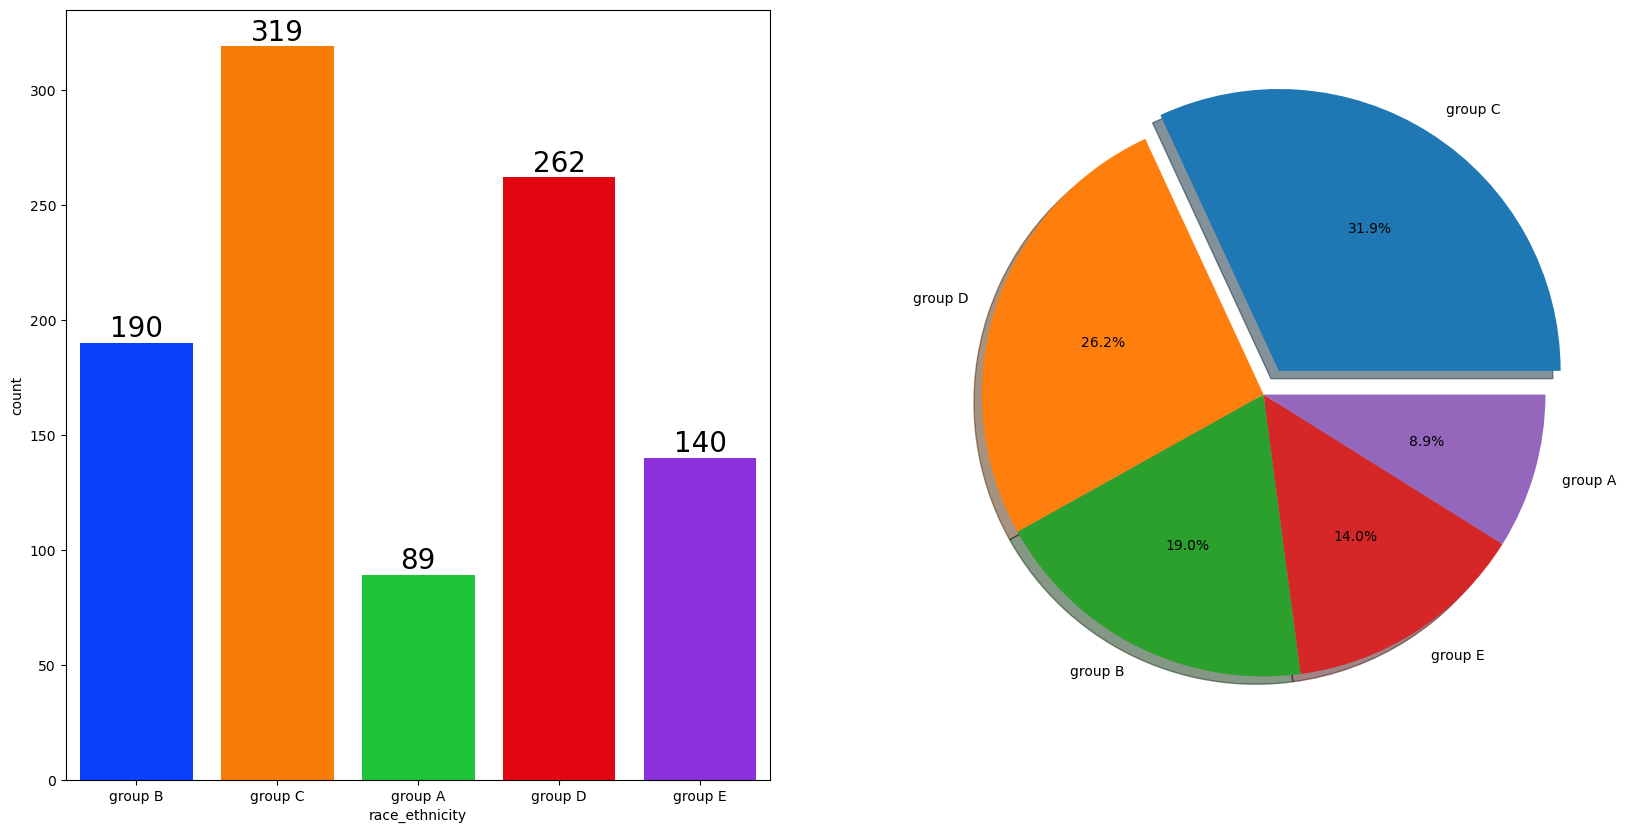

In [27]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['race_ethnicity'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['race_ethnicity'].value_counts(),labels=df['race_ethnicity'].value_counts().index,explode=[0.1,0,0,0,0],autopct='%1.1f%%',shadow=True)
plt.show()   

__BIVARIATE ANALYSIS__ Does Race_Ethnicity has any impact on Students Performance?

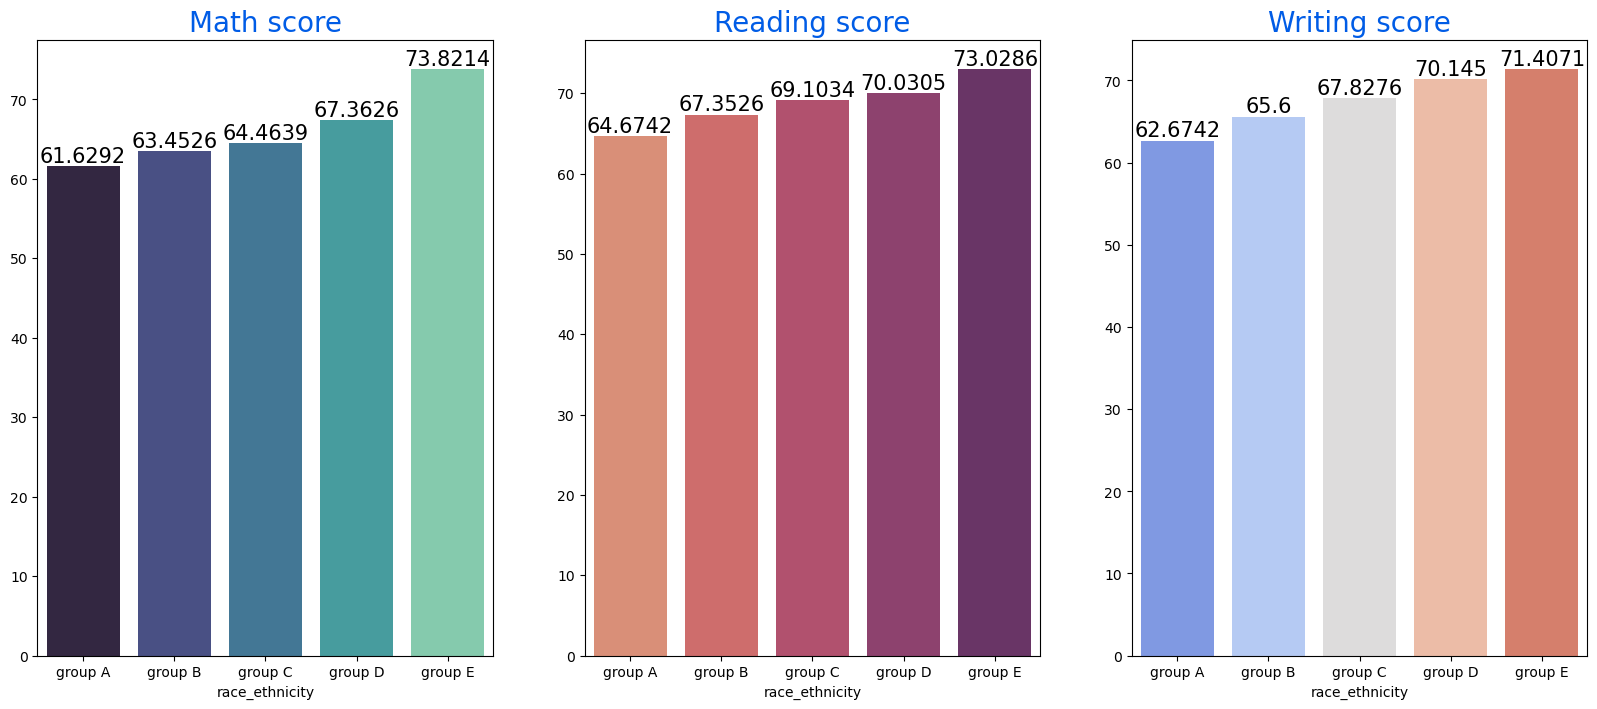

In [28]:
Group_data2=df.groupby('race_ethnicity')
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=Group_data2['math_score'].mean().index,y=Group_data2['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)

for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['reading_score'].mean().index,y=Group_data2['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)

for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)

sns.barplot(x=Group_data2['writing_score'].mean().index,y=Group_data2['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)

for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)

Insights:
- Group E studens have scored the highest marks in all subjects (Math, Reading and Writing)
- Group A students have scored the lowest marks in all the three cateogories of Math Scores, Reading Scores and Writing Scores
- Students from a lower Socioeconomic status have a lower average in all course subjects.

4.4.3 : PARENETAL LEVEL OF EDUCATION COLUMN
- What is Educational background of students' parent?
- Does Parental Education has any impact on student's performance?

UNIVARIATE ANALYSIS ( What is the Educational backgroud of student's parent?)

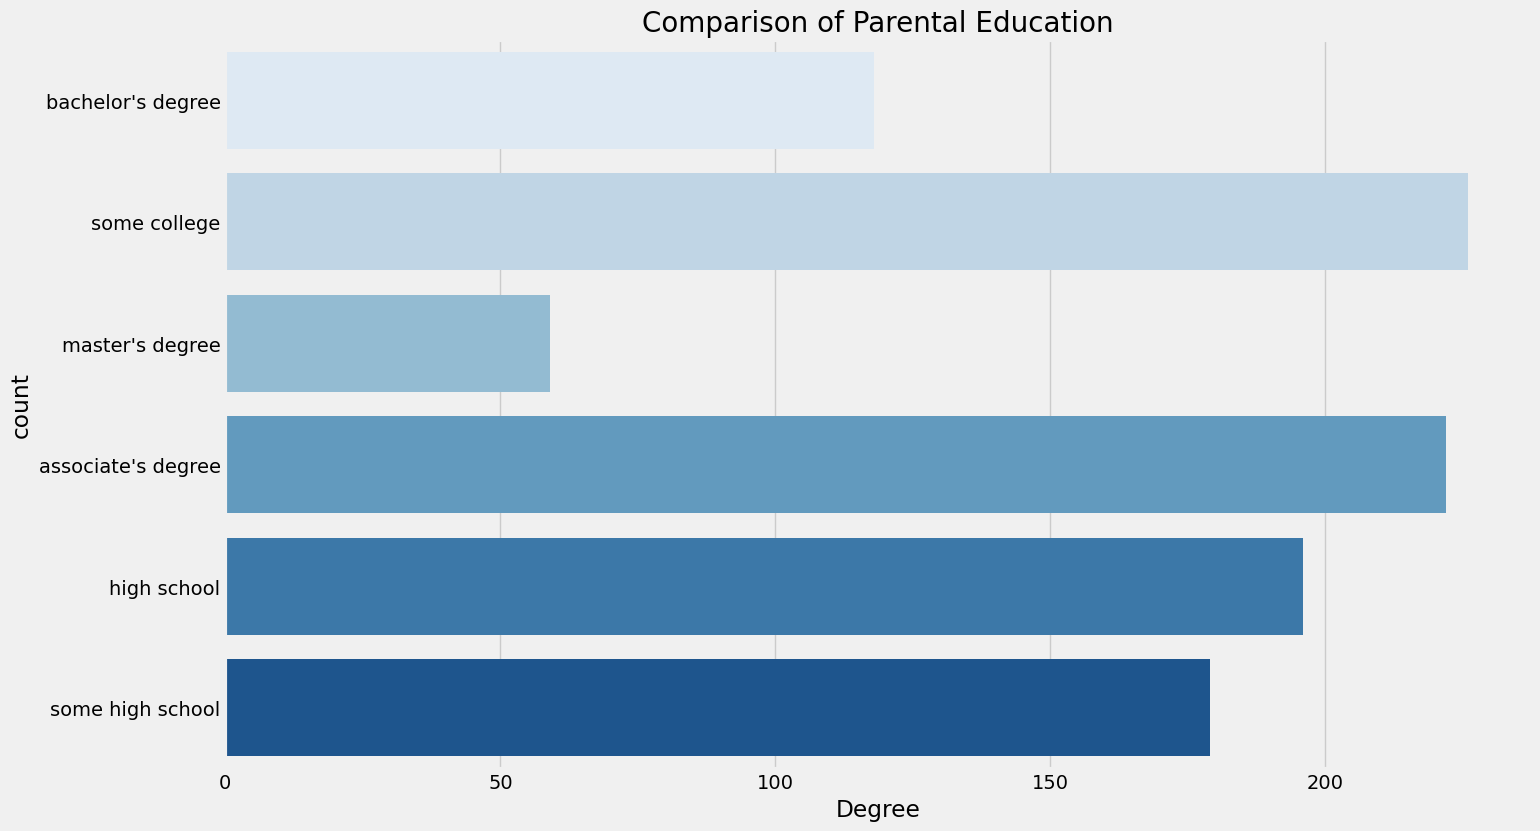

In [29]:
plt.rcParams['figure.figsize'] = (15,9)
plt.style.use('fivethirtyeight')
sns.countplot(df['parental_level_of_education'], palette = 'Blues')
plt.title('Comparison of Parental Education', fontweight = 30, fontsize=  20)
plt.xlabel('Degree')
plt.ylabel('count')
plt.show()



Insights:
- Larger number of parents are from some college

BIVARIATE ANALYSIS ( Does Parental Educatio has any impact on Student's performance ?)

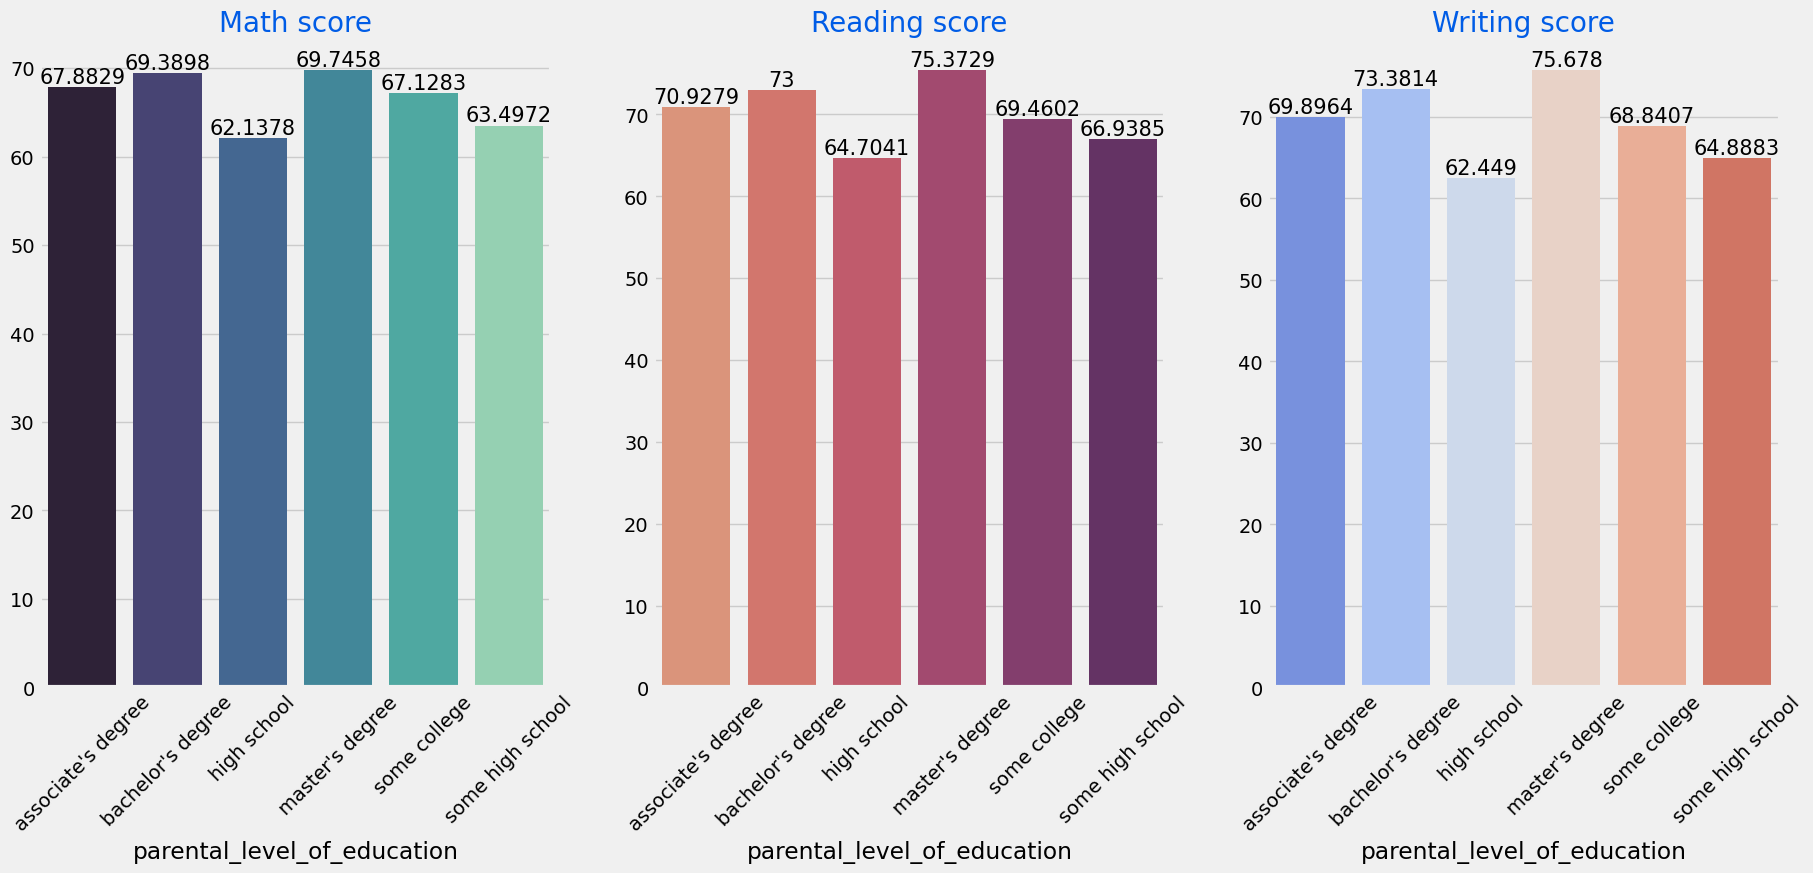

In [30]:
# df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
# plt.legend(bbox_to_anchor= (1.05,1), loc=2, borderaxespad=0.1)
# plt.show()
Group_data3=df.groupby('parental_level_of_education')
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=Group_data3['math_score'].mean().index,y=Group_data3['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    plt.xticks(rotation=45)

sns.barplot(x=Group_data3['reading_score'].mean().index,y=Group_data3['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)
    plt.xticks(rotation=45)

sns.barplot(x=Group_data3['writing_score'].mean().index,y=Group_data3['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)
    plt.xticks(rotation=45)


#### 4.4.4 LUNCH COLUMN
- What type of lunch is most common among students?
- What is the effect of lunch type on the test results?

__UNIVARITA ANALYSIS__ ( Which type of lunch is most common among students)

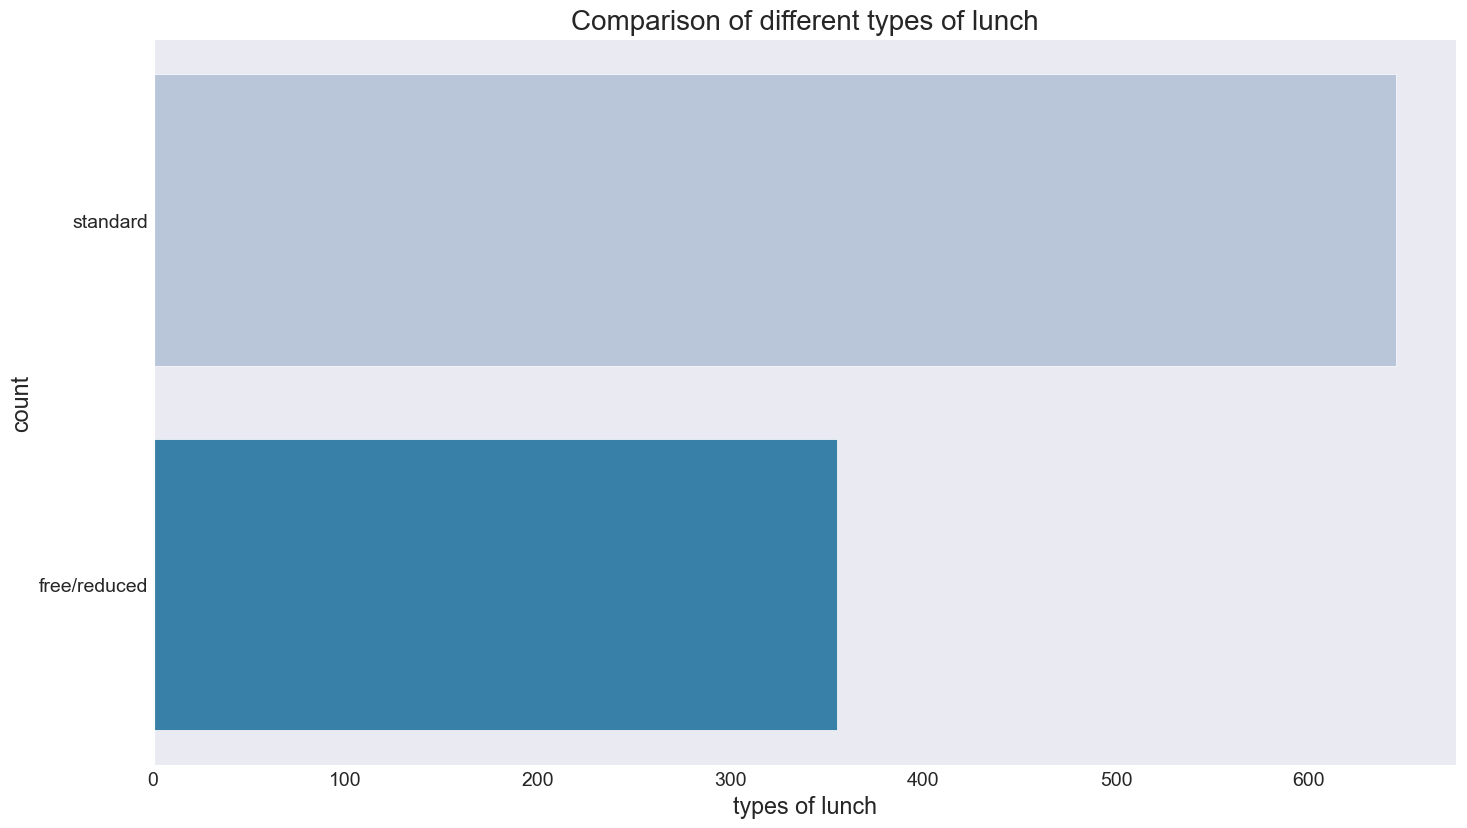

In [31]:


plt.rcParams['figure.figsize'] = (15, 9)
# plt.style.use('seaborn-talk')
sns.set_style('dark')
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

Insights:
- Students being served Standard Lunch was more than free lunch

__BIVARIATE ANALYSIS__ ( Does Lunch Intake has any impact on the Student's Performace?)

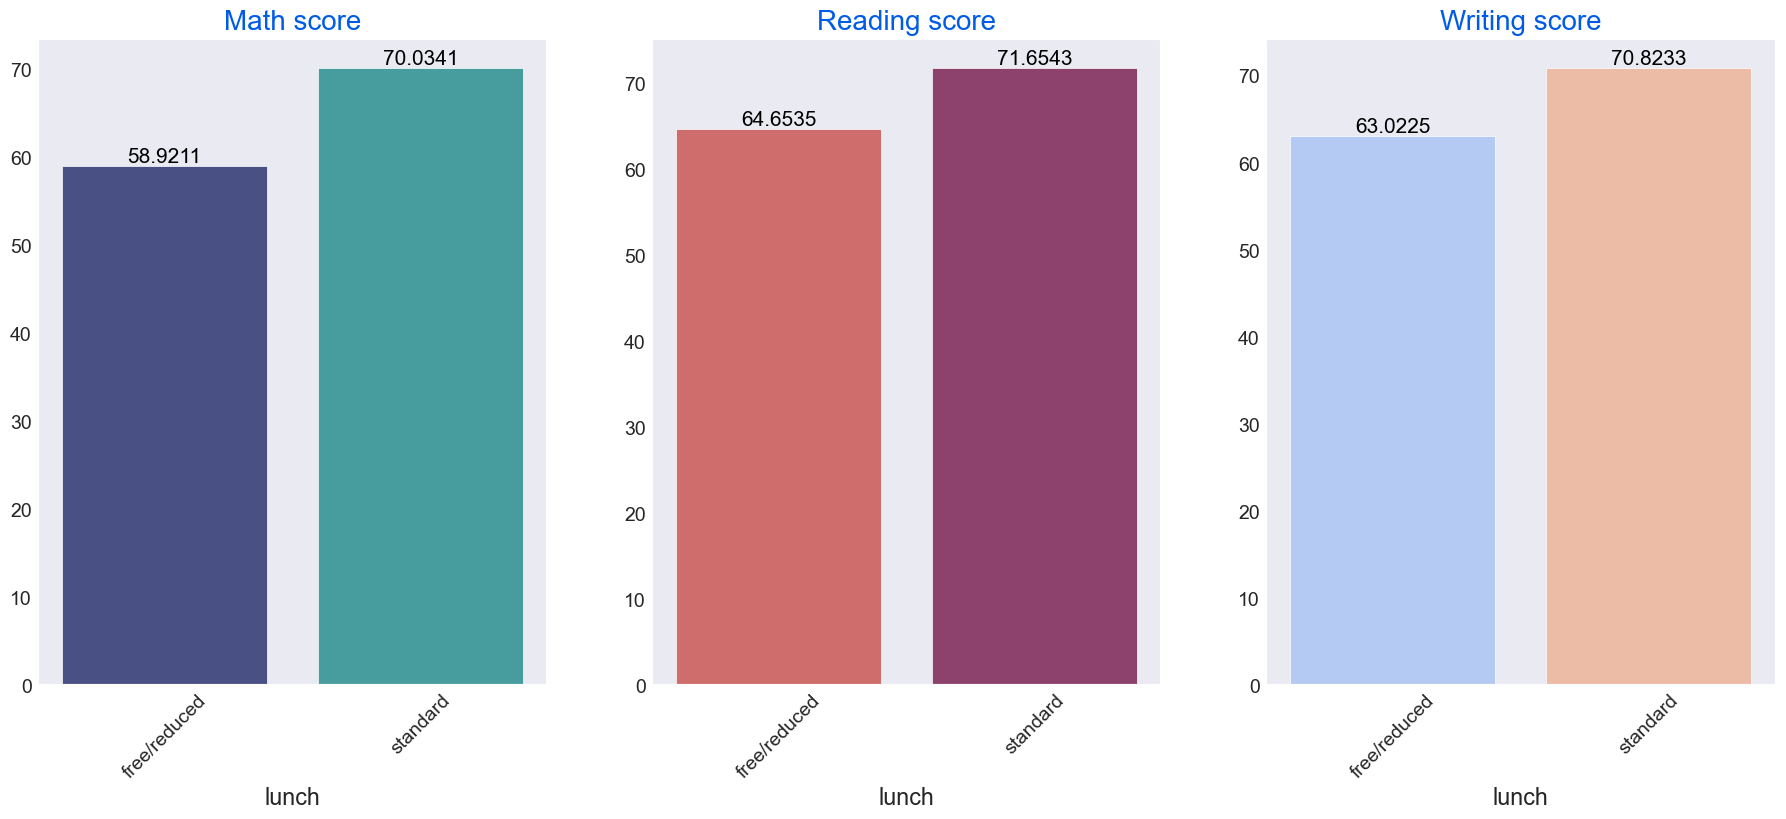

In [32]:
# f,ax=plt.subplots(1,2,figsize=(20,8))
# sns.countplot(x=df['lunch'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[0])
# ax[0].set_title('Lunch vs Students Marks ',color='black',size=25)
# for container in ax[0].containers:
#     ax[0].bar_label(container,color='black',size=20)
    
# sns.countplot(x=df['lunch'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
# for container in ax[1].containers:
#     ax[1].bar_label(container,color='black',size=20) 

# df.groupby('parental_level_of_education').agg('mean').plot(kind='barh',figsize=(10,10))
# plt.legend(bbox_to_anchor= (1.05,1), loc=2, borderaxespad=0.1)
# plt.show()
Group_data4=df.groupby('lunch')
f,ax=plt.subplots(1,3,figsize=(20,8))

sns.barplot(x=Group_data4['math_score'].mean().index,y=Group_data4['math_score'].mean().values,palette = 'mako',ax=ax[0])
ax[0].set_title('Math score',color='#005ce6',size=20)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=15)
    plt.xticks(rotation=45)

sns.barplot(x=Group_data4['reading_score'].mean().index,y=Group_data4['reading_score'].mean().values,palette = 'flare',ax=ax[1])
ax[1].set_title('Reading score',color='#005ce6',size=20)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=45)
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=15)
    plt.xticks(rotation=45)

sns.barplot(x=Group_data4['writing_score'].mean().index,y=Group_data4['writing_score'].mean().values,palette = 'coolwarm',ax=ax[2])
ax[2].set_title('Writing score',color='#005ce6',size=20)
ax[2].set_xticklabels(ax[2].get_xticklabels(), rotation=45)
for container in ax[2].containers:
    ax[2].bar_label(container,color='black',size=15)
    plt.xticks(rotation=45)


Insights:
- Students taking Standard Lunch are scoring more in all the three scores with respect to the Students who are taking free lunch

#### 4.4.5 TEST PREPARATION COURSE COLUMN
- Which type of test preparation course is most common among students?
- Does Test Preparation coure has any impact on Student's performance?

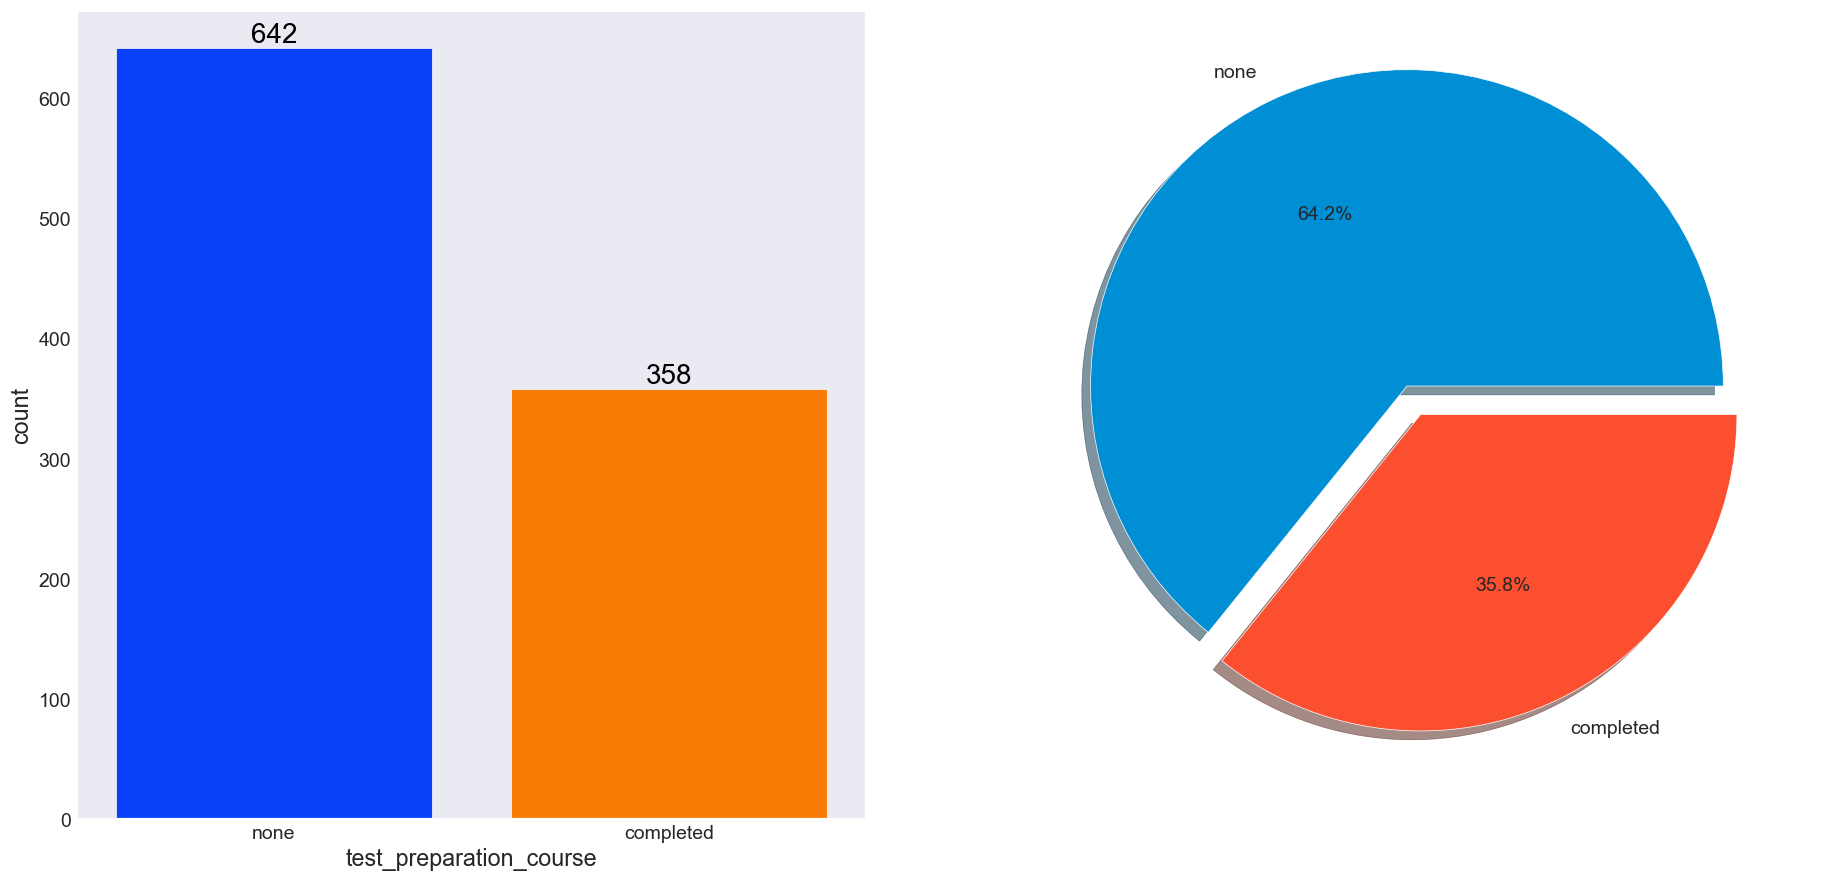

In [33]:
f,ax=plt.subplots(1,2,figsize=(20,10))
sns.countplot(x=df['test_preparation_course'],data=df,palette = 'bright',ax=ax[0],saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
plt.pie(x = df['test_preparation_course'].value_counts(),labels=df['test_preparation_course'].value_counts().index,explode=[0.1,0],autopct='%1.1f%%',shadow=True)
plt.show()   

Insights:
- More than half of the students haven't completed the test preparation course yet.

In [34]:
df.groupby('gender')['test_preparation_course'].value_counts()

gender  test_preparation_course
female  none                       334
        completed                  184
male    none                       308
        completed                  174
Name: count, dtype: int64

<Axes: xlabel='test_preparation_course', ylabel='writing_score'>

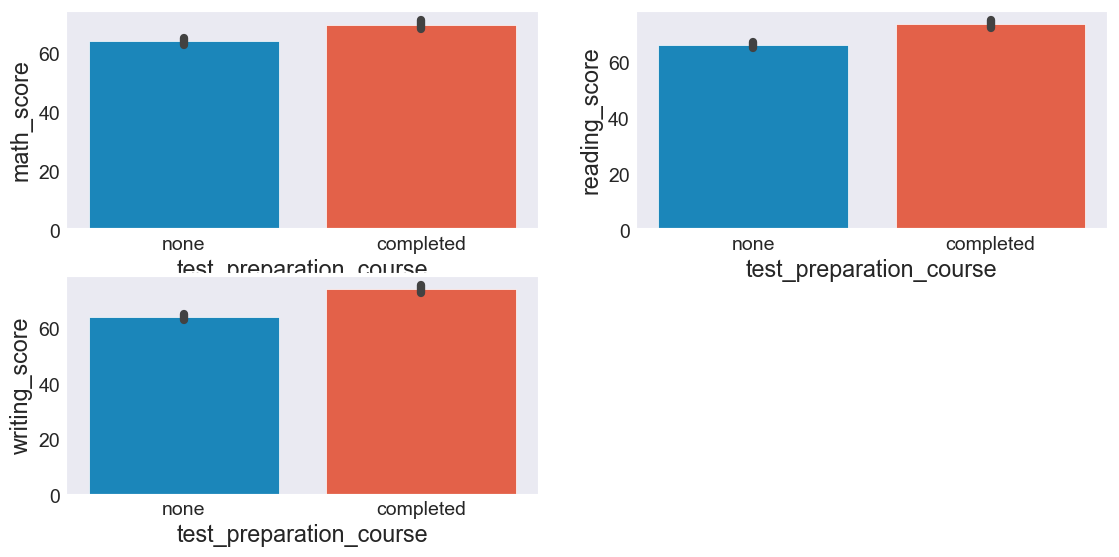

In [35]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['test_preparation_course'], y=df['math_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,2)
sns.barplot (x=df['test_preparation_course'], y=df['reading_score'], hue=df['test_preparation_course'])
plt.subplot(2,2,3)
sns.barplot (x=df['test_preparation_course'], y=df['writing_score'], hue=df['test_preparation_course'])

Insights:
- Students who have coompleted the test preparation score have scored higher in all three categories as compared to those who haven't taken the course.

#### 4.4.6 CHECKING OUTLIERS.

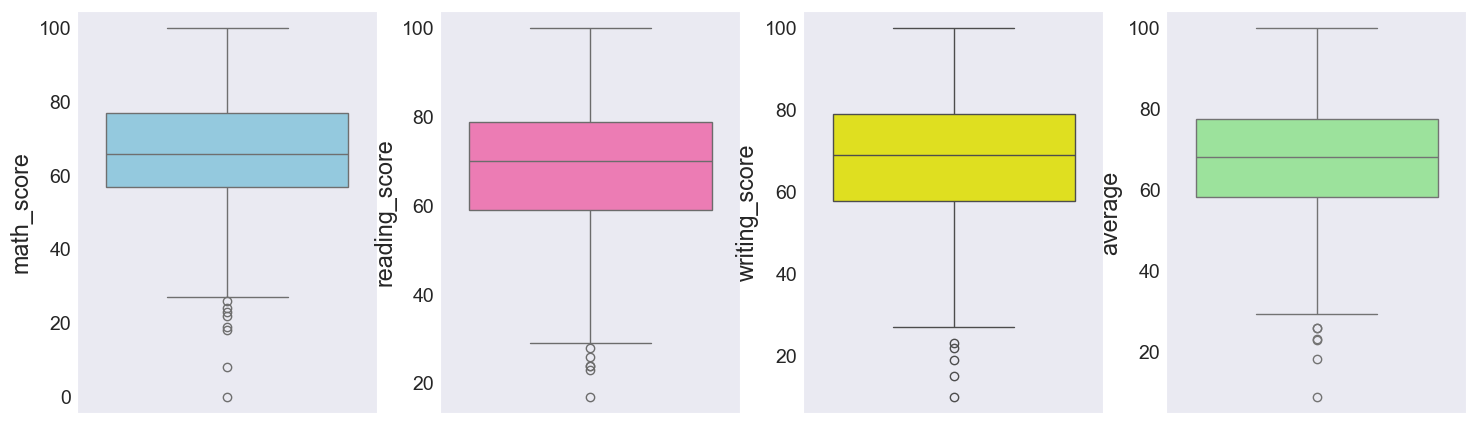

In [36]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math_score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading_score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing_score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['average'],color='lightgreen')
plt.show()

#### 4.4.7 MULTIVARIATE ANALYSIS USING PAIRPLOT

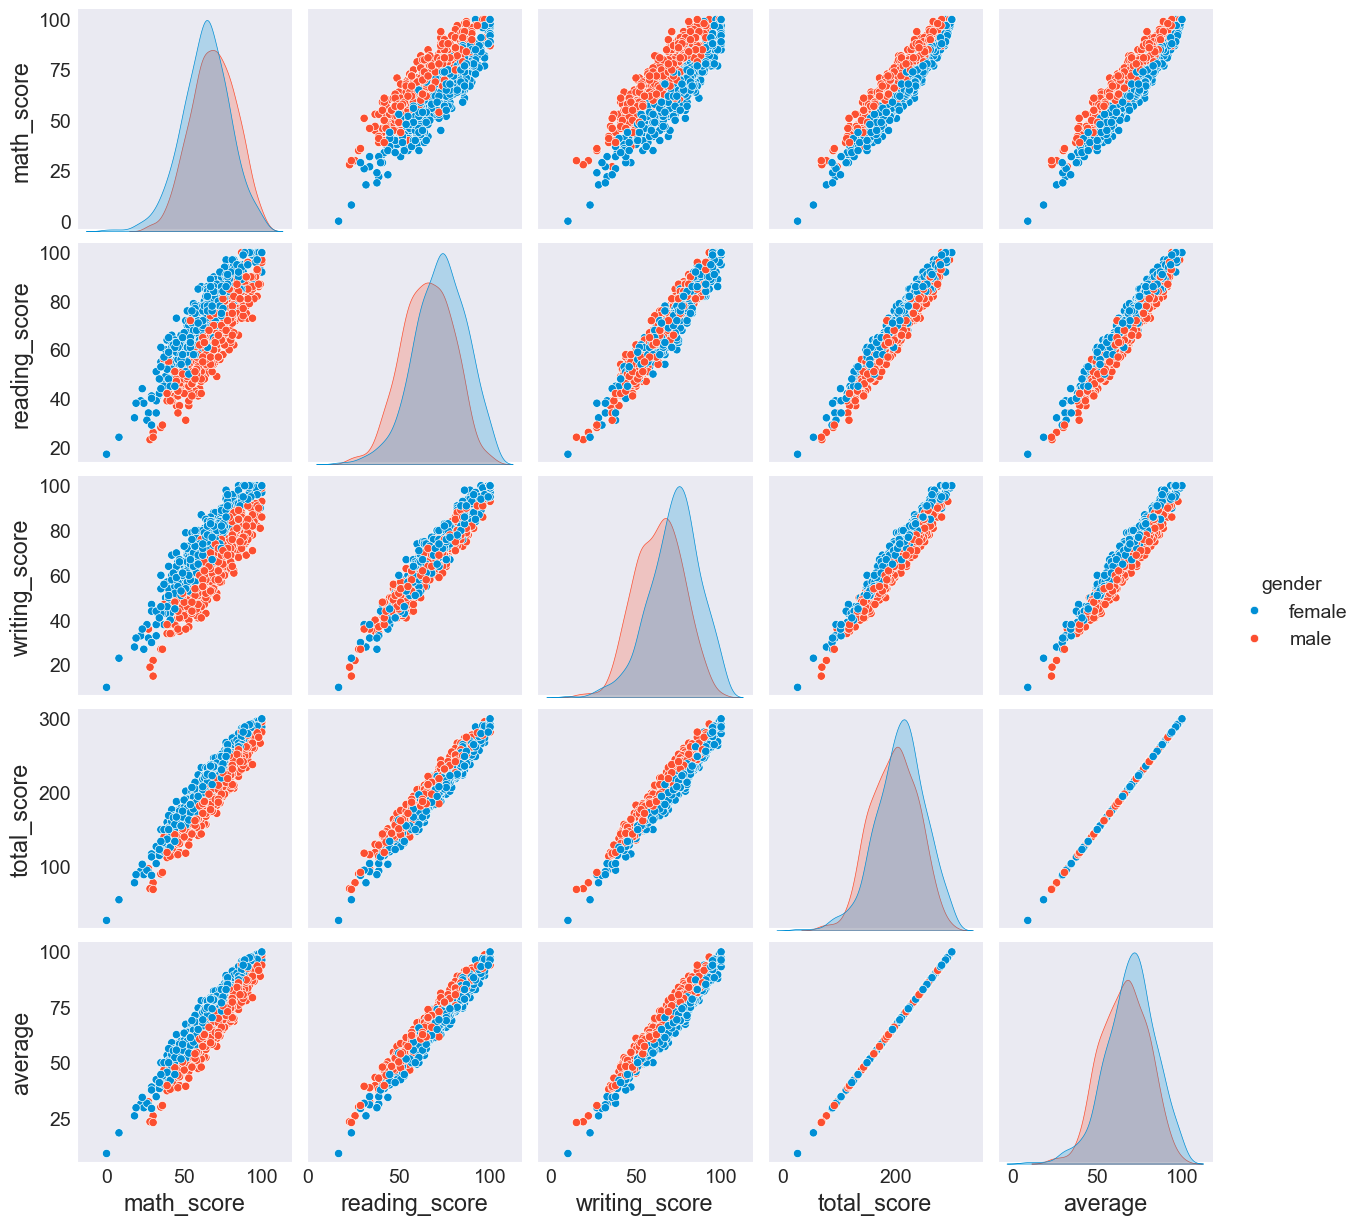

In [37]:
sns.pairplot(df, hue='gender')
plt.show()

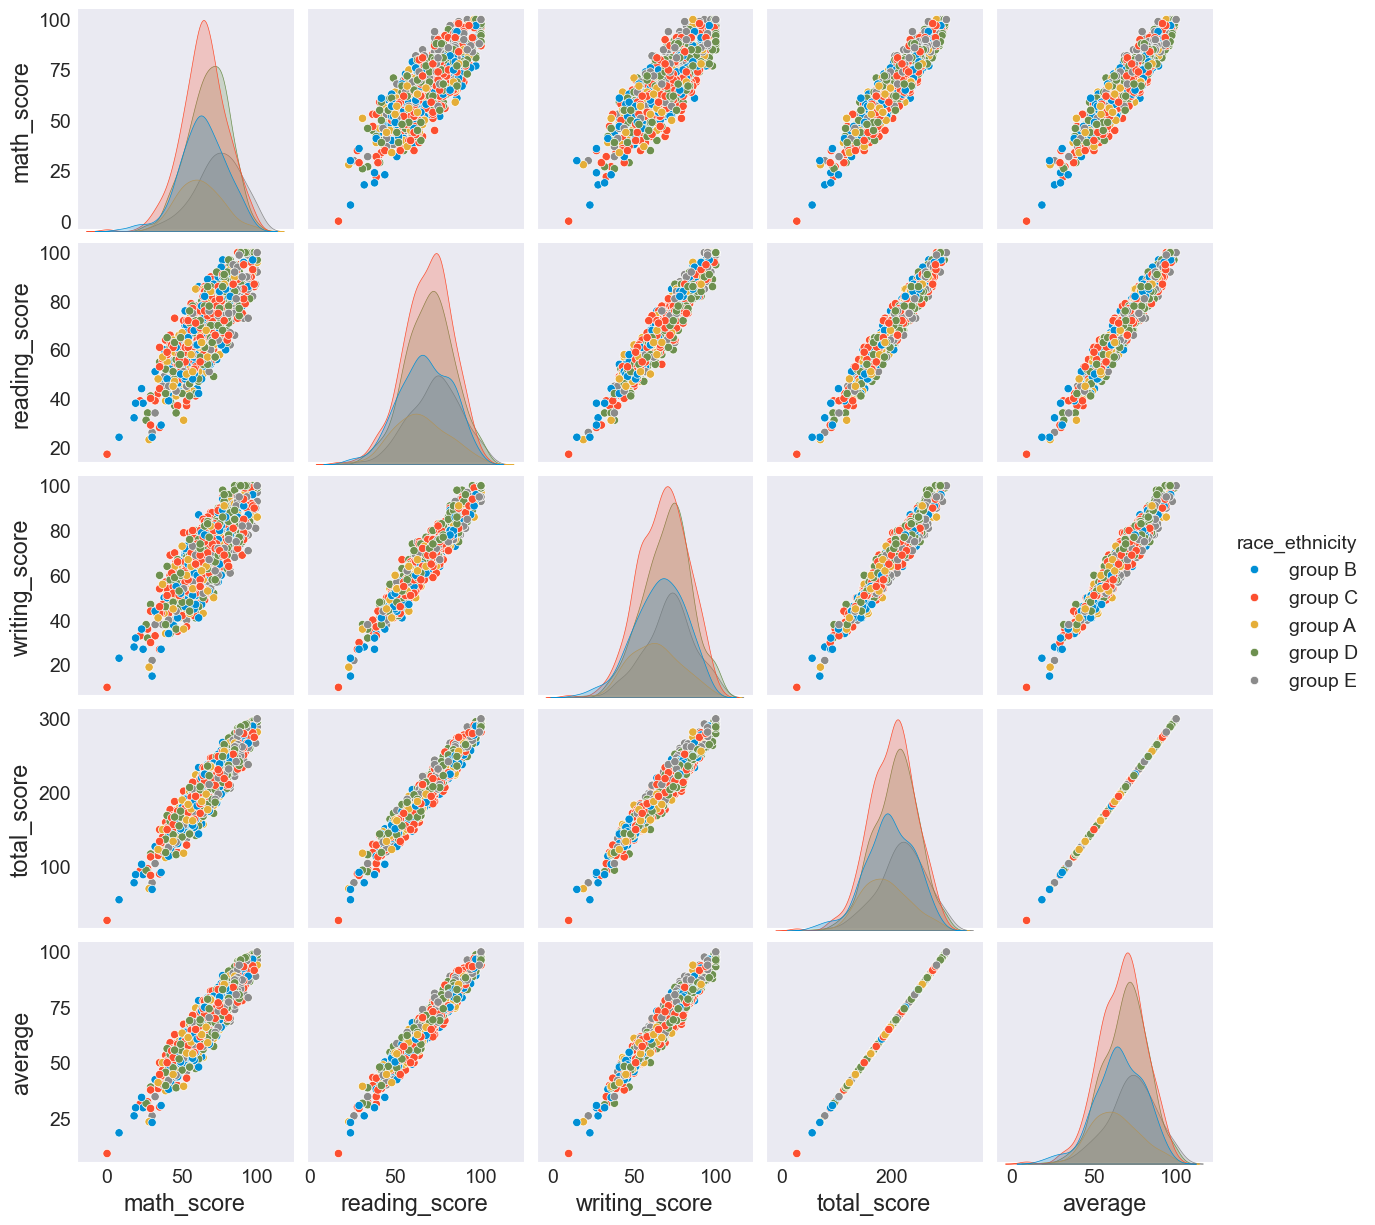

In [38]:
sns.pairplot(df, hue='race_ethnicity')
plt.show()

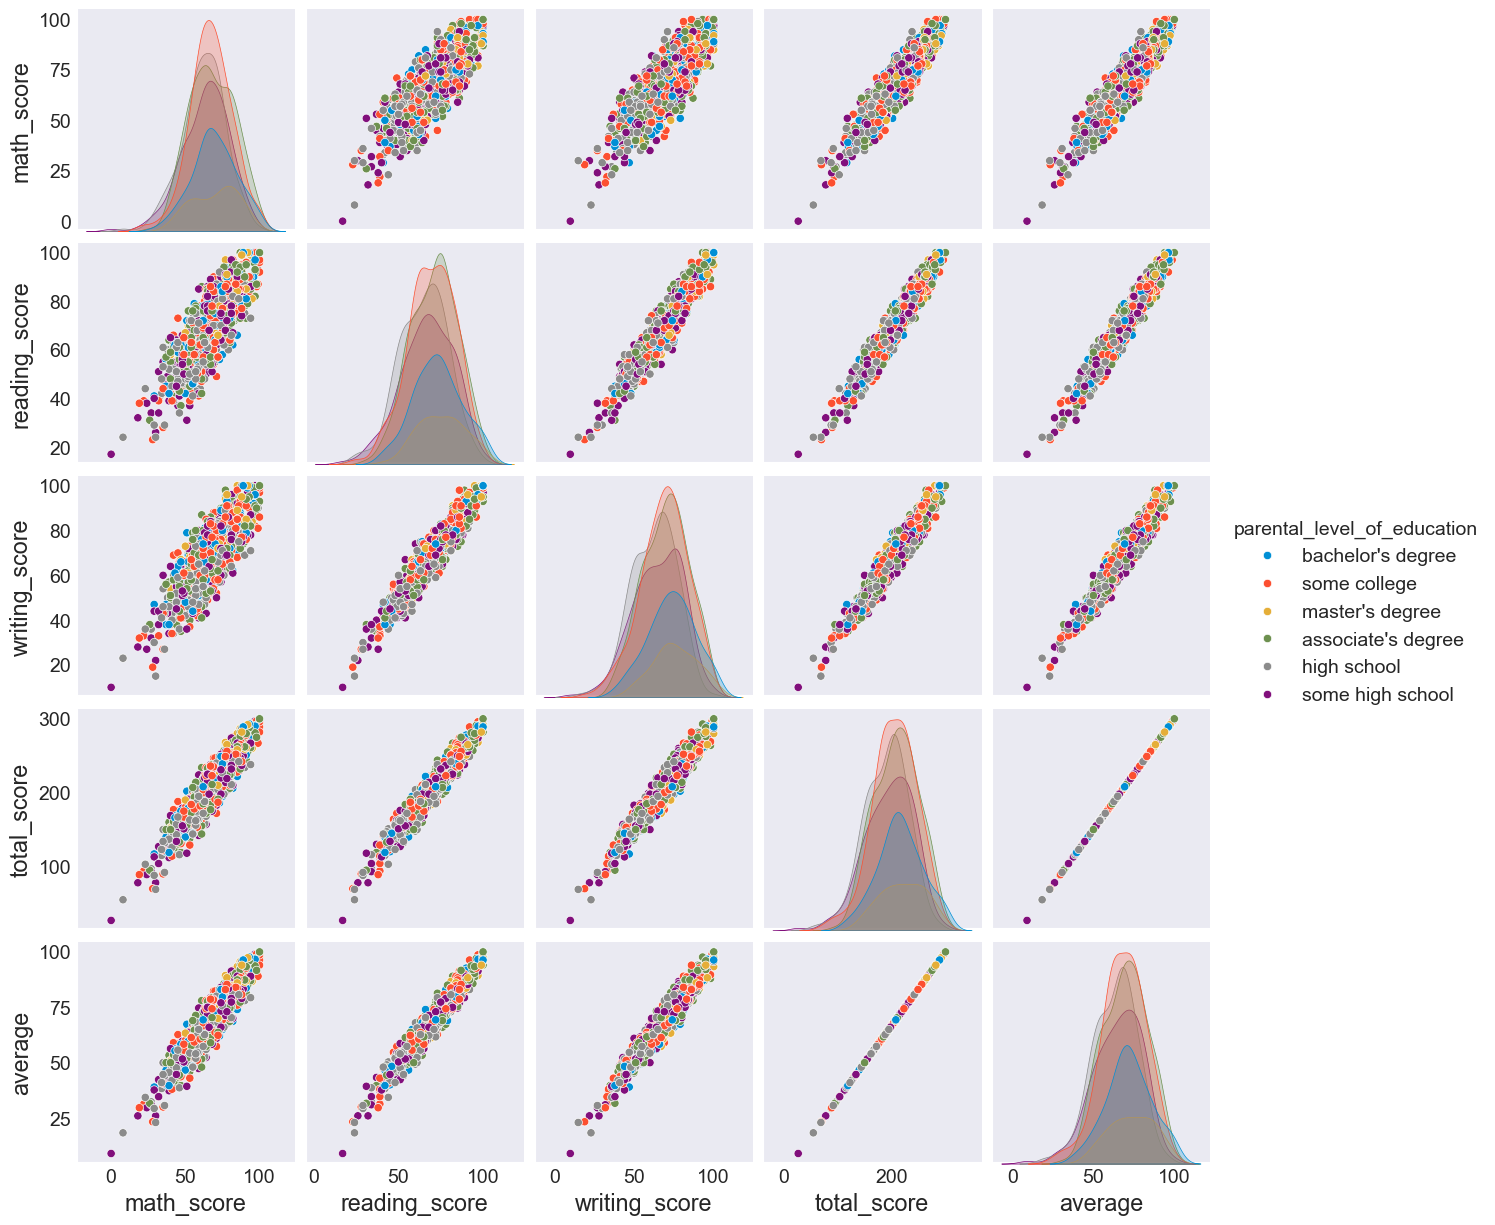

In [39]:
sns.pairplot(df, hue='parental_level_of_education')
plt.show()

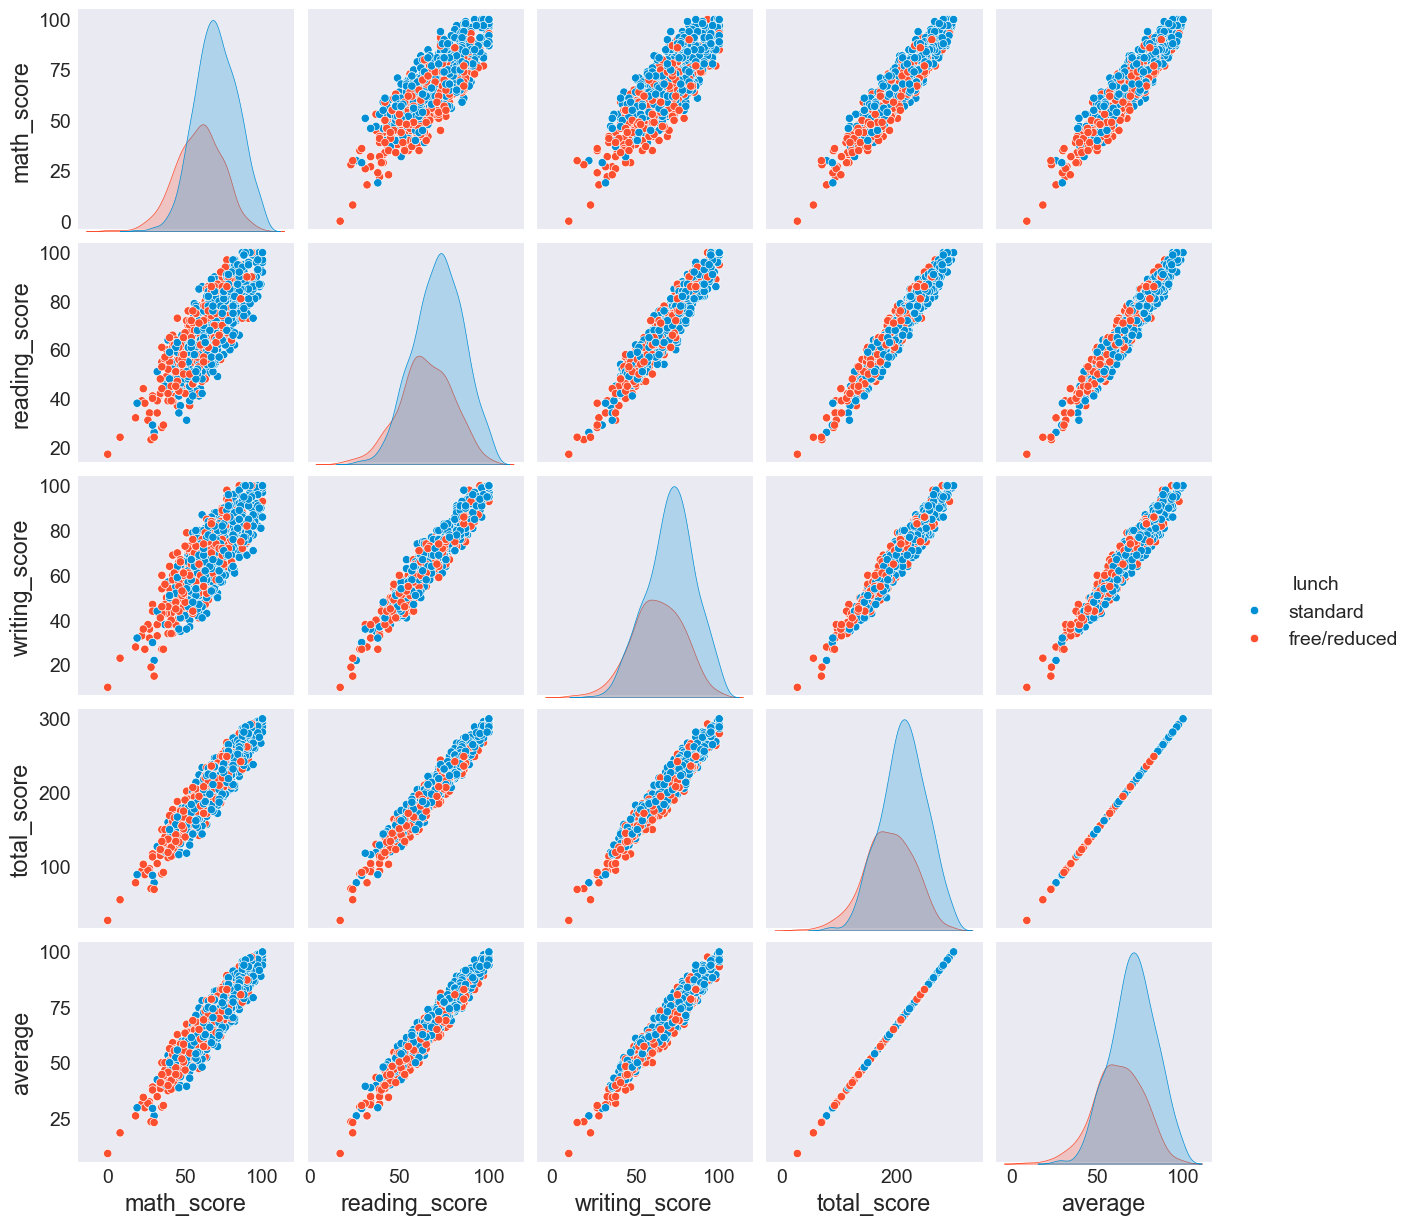

In [40]:
sns.pairplot(df, hue='lunch')
plt.show()

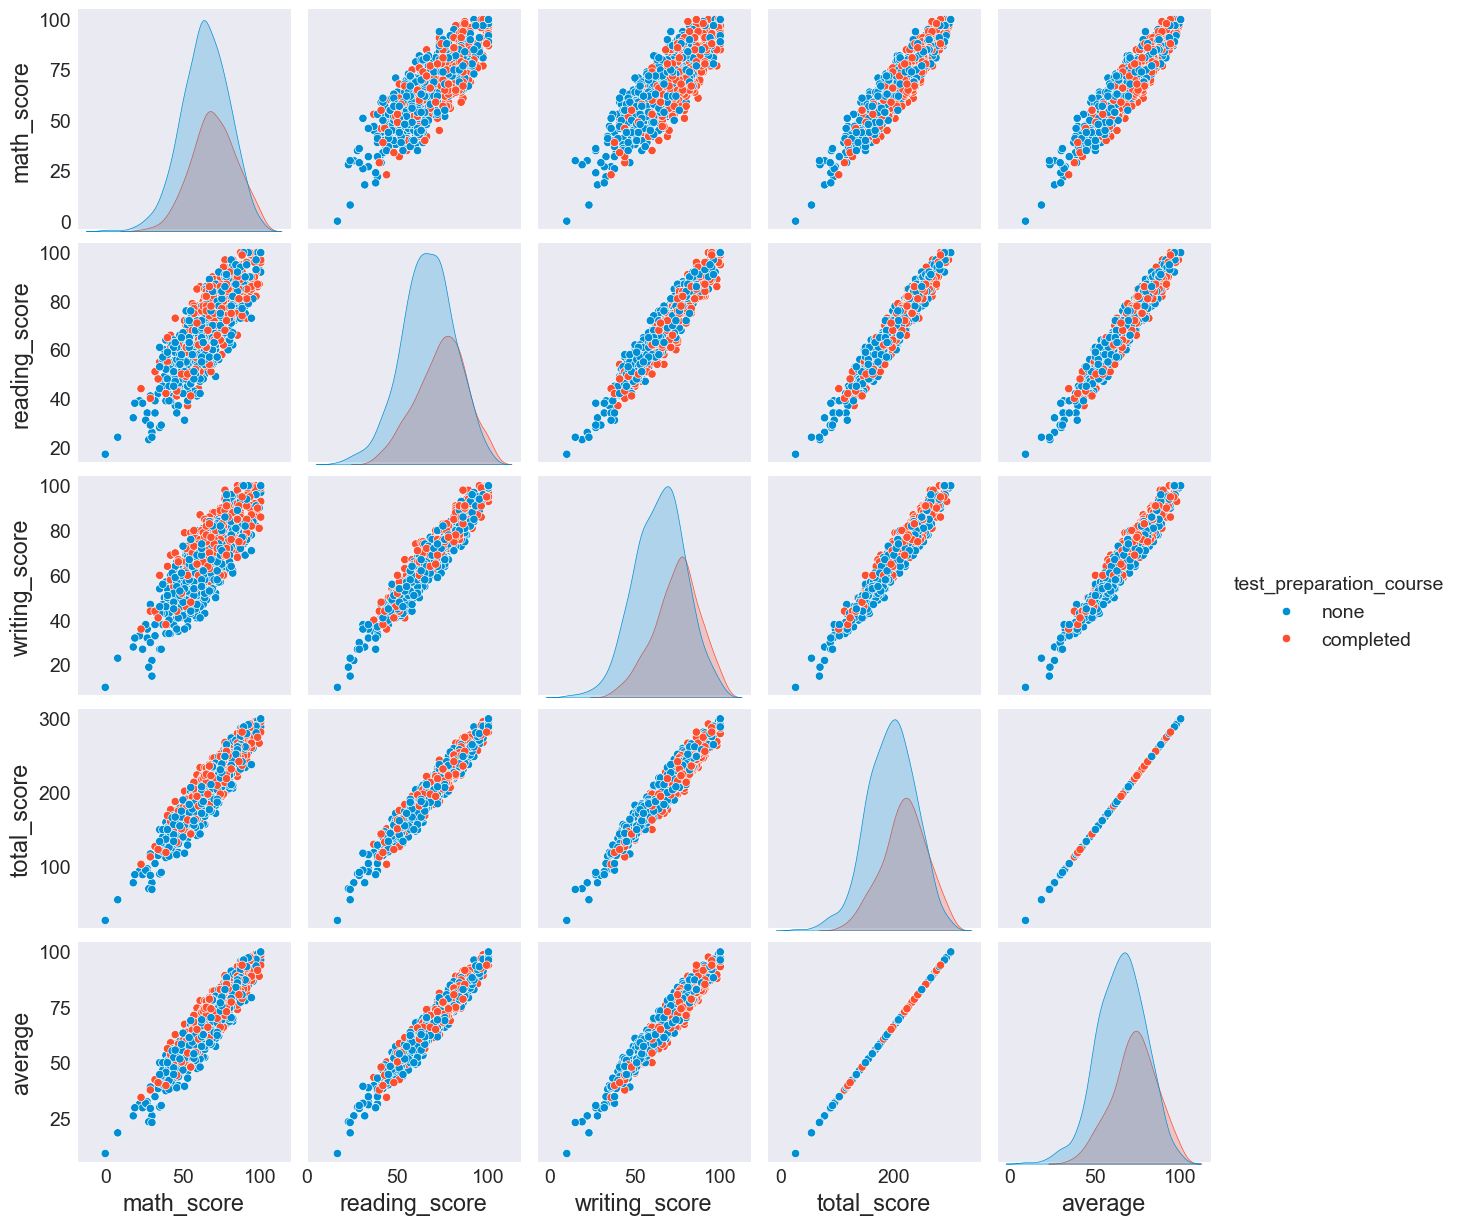

In [41]:
sns.pairplot(df, hue='test_preparation_course')
plt.show()

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education.
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course, but data shows more inclination of good marks towards the students who tend to complete the test preparation course.
- Finishing preparation course is beneficial.